# <font color=blue>Water Quality Prediction</font> 

In [294]:
# Let's start with importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [295]:
# import data and view
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [296]:
# check data types, ensure all data is numerical
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [297]:
# check the data for null values
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [298]:
# fill missing values with median values
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

In [299]:
df['ph'].fillna(value=df['ph'].mean(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].mean(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].mean(),inplace=True)

In [300]:
# check to verify any missing values
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [301]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


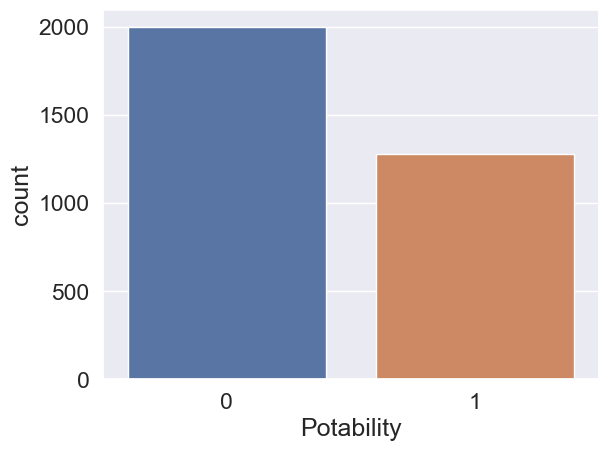

In [302]:
# Now that data has been cleaned, let's visualize the data
# Below is a bar graph showing the distribution of potable vs non-potable water
sns.countplot(x="Potability",data=df) 
plt.show()

In [303]:
# Check the specific amount of Non-potable water samples
df['Potability'].value_counts()[0]

1998

In [304]:
# Check the specific amount of potable water samples
df['Potability'].value_counts()[1]

1278

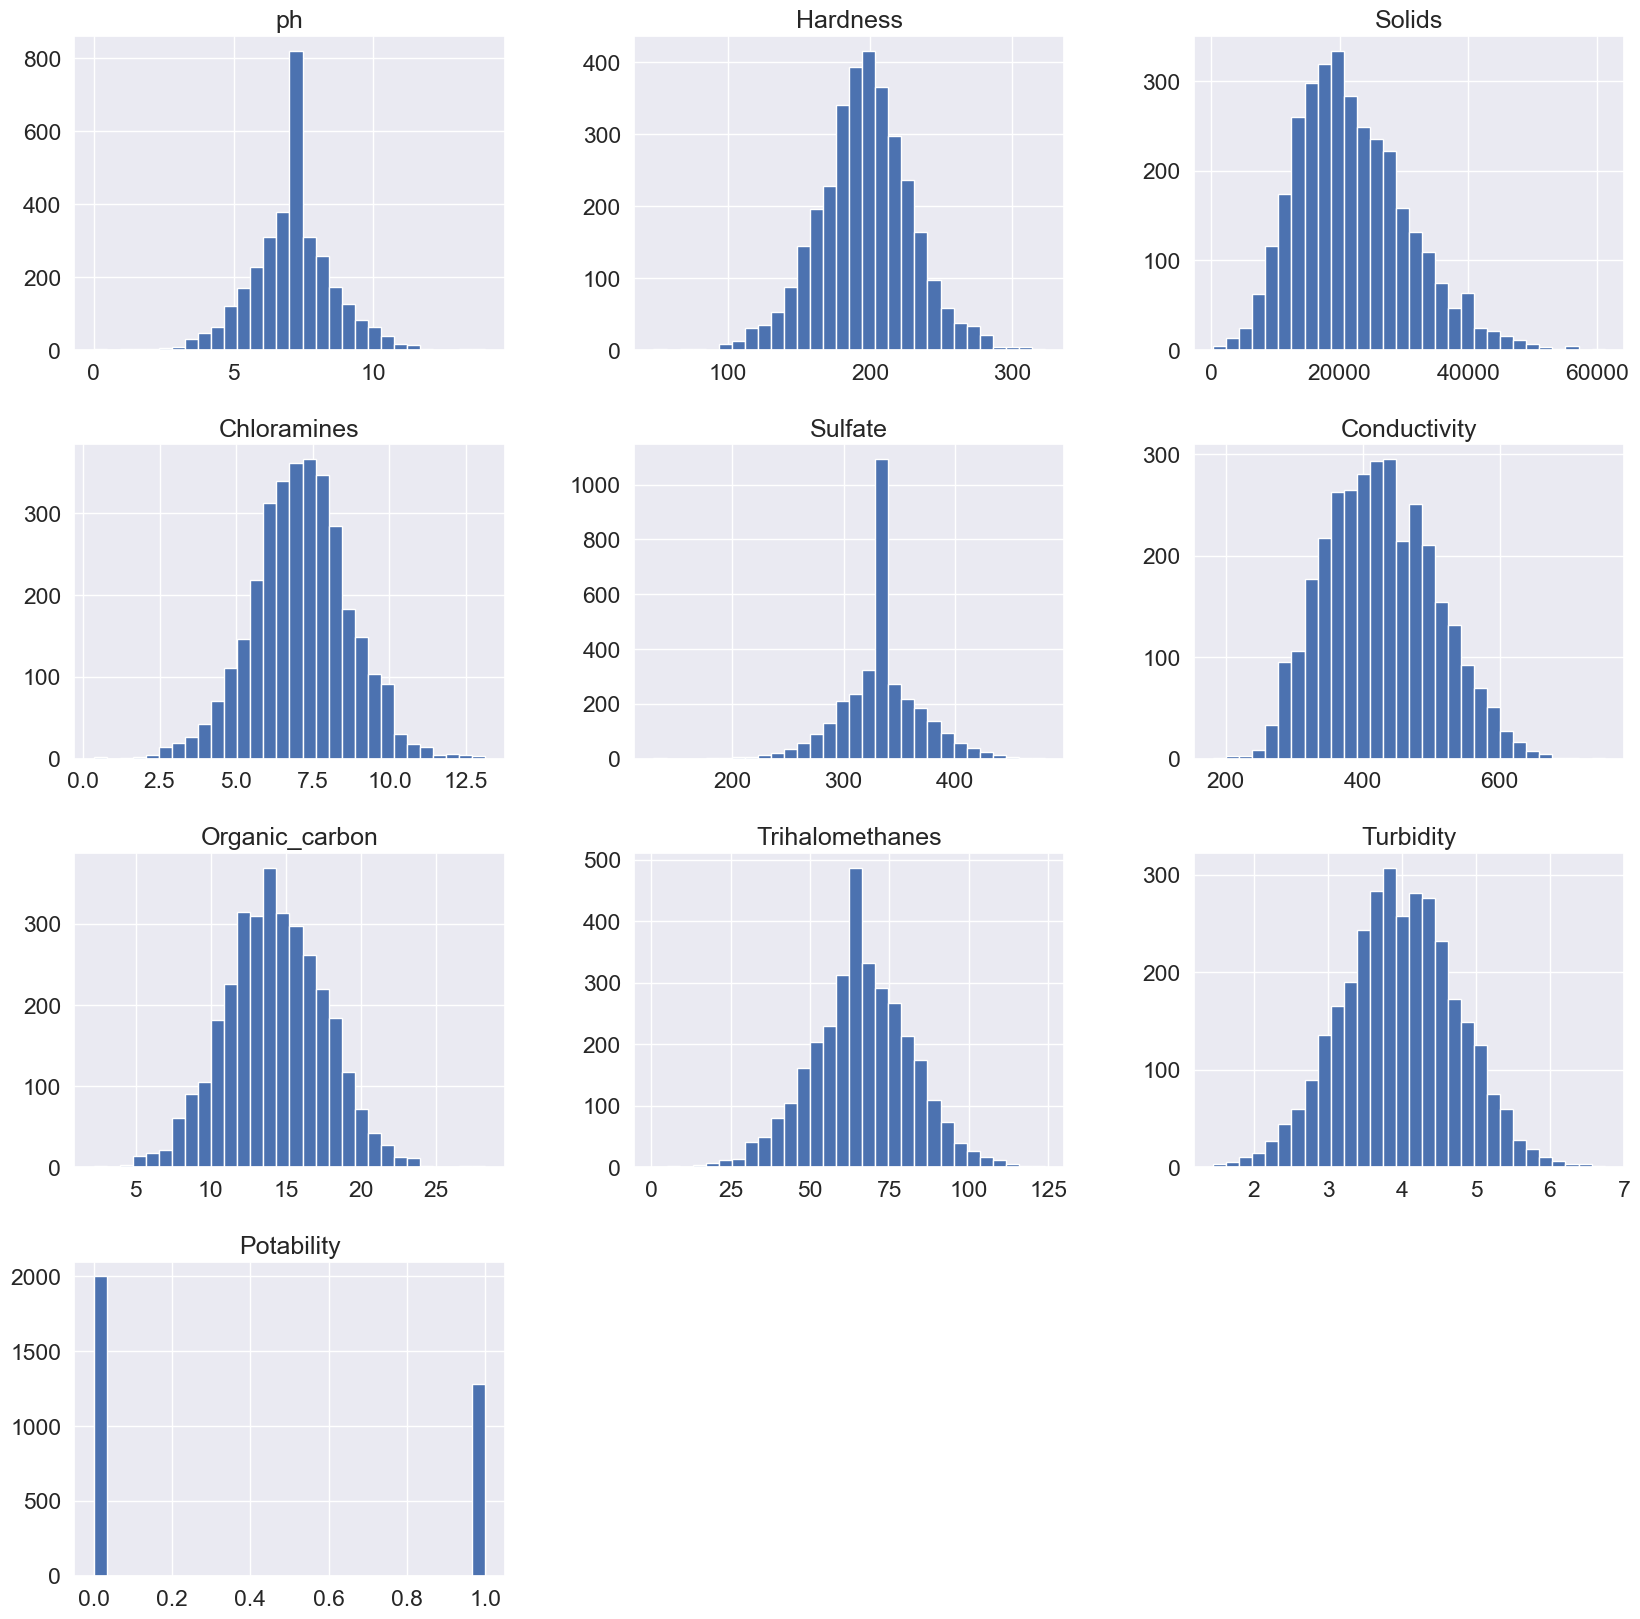

In [305]:
# The histograms below show the count and distribution of each characteristic.
df.hist(bins=30,figsize=[20,20])
plt.show()

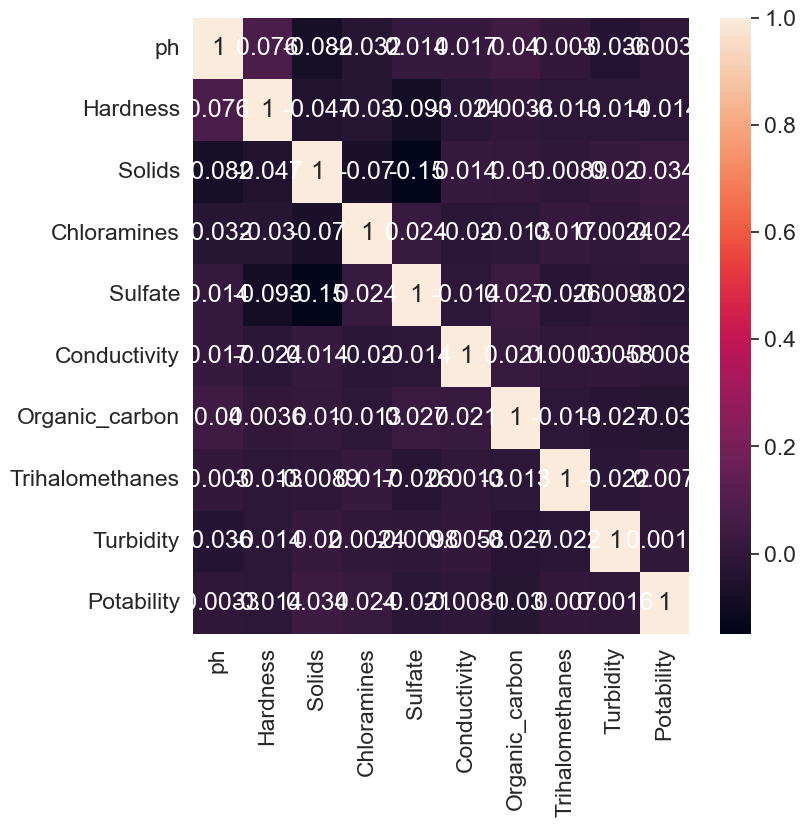

In [306]:
# The figure below shows correlations between each label
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

In [324]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=90)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train);

# Accuracy score
clf.score(X_test, y_test)


0.6814024390243902

In [325]:
# Make predictions on the unseen test data
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [326]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[361,  51],
       [158,  86]])

In [327]:
# Unseen values to test
# Test1 values are within acceptable ranges for safe drinking water, resulting in Potable result
test1 = clf.predict([ [7,183,17978,8,23,398,16,31,5] ])
if test1 == 1:
    print("Potable")
if test1 == 0:
    print("Non-potable")


Potable


In [328]:
# pH level was changed to an unsafe level of 1, resulting in Non-potable result
test2 = clf.predict([ [1,183,17978,8,23,398,16,31,5] ])
if test2 == 1:
    print("Potable")
if test2 == 0:
    print("Non-potable")


Non-potable


In [329]:
# Sulfate level was changed to unsafe level of 300, resulting in Non-potable result
test3 = clf.predict([ [7,183,17978,8,300,398,16,31,5] ])
if test3 == 1:
    print("Potable")
if test3 == 0:
    print("Non-potable")


Non-potable


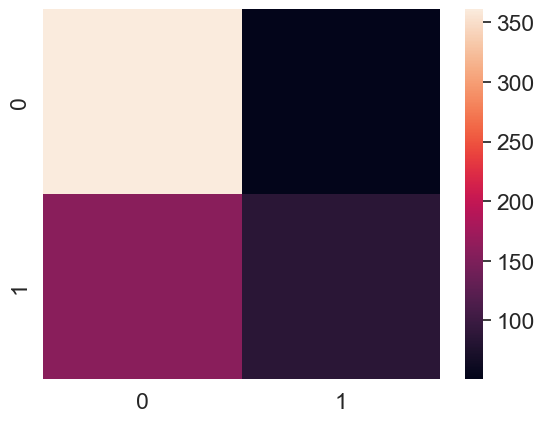

In [330]:
# Set the font scale
sns.set(font_scale=1.5)

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

In [331]:
# Setting up the UI portion
file = open("water.jpg", "rb")
image = file.read()

image_text = widgets.Image(value=image, format='jpeg', width='300')

label_text = widgets.Label(value='Water Quality Prediction Tool', style={'description_width': 'initial'})

vbox_topic = widgets.VBox([image_text, label_text])

style = {'description_width': 'initial'}
layout = {'width': '600px'}

In [332]:
# Widgets
ph = widgets.FloatSlider(
    style=style,
    layout=layout,
    value=7,
    min=1,
    max=10,
    step=0.1,
    description='pH:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
Hardness = widgets.FloatSlider(
    style=style,
    layout=layout,
    value=183,
    min=0,
    max=500,
    step=1,
    description='Hardness:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
Solids = widgets.FloatSlider(
    style=style,
    layout=layout,
    value=17978,
    min=10000,
    max=50000,
    step=100,
    description='Solids:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
Chloramines = widgets.FloatSlider(
    style=style,
    layout=layout,
    value=8,
    min=1,
    max=20,
    step=0.1,
    description='Chloramines:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
Sulfate = widgets.FloatSlider(
    style=style,
    layout=layout,
    value=23,
    min=0,
    max=500,
    step=1,
    description='Sulfate:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
Conductivity = widgets.FloatSlider(
    style=style,
    layout=layout,
    value=398,
    min=100,
    max=800,
    step=1,
    description='Conductivity:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
Organic_carbon = widgets.FloatSlider(
    style=style,
    layout=layout,
    value=16,
    min=1,
    max=20,
    step=0.1,
    description='Organic_carbon:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
Trihalomethanes = widgets.FloatSlider(
    style=style,
    layout=layout,
    value=31,
    min=1,
    max=200,
    step=1,
    description='Trihalomethanes:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
Turbidity = widgets.FloatSlider(
    style=style,
    layout=layout,
    value=5,
    min=0,
    max=10,
    step=0.1,
    description='Turbidity:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

In [333]:

calc_button = widgets.Button(description='Calculate Potability', tooltip='Calculate Potability', style=style, layout=layout)

result = widgets.Output()

def calculate(event):
    with result:
        clear_output()

        df = pd.DataFrame([np.array([ph.value, Hardness.value, Solids.value, Chloramines.value, Sulfate.value, 
                                     Conductivity.value, Organic_carbon.value, Trihalomethanes.value, 
                                     Turbidity.value])], 
                                     columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 
                                                'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity',
                                                ])
        print("This water sample is:")
        prediction =  clf.predict(df)
        if (prediction == 1):
            print("Potable")
        
        if (prediction == 0):
            print("Not Potable")
        

calc_button.on_click(calculate)

vbox_result = widgets.VBox([calc_button, result])

In [334]:
vbox_text = widgets.VBox([ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, 
                          Organic_carbon, Trihalomethanes, Turbidity, vbox_result])


page = widgets.HBox([vbox_topic, vbox_text])
display(page)